In [11]:
import numpy as np
import matplotlib.pyplot as plt
from pymoo.algorithms.soo.nonconvex.ga import GA
from pymoo.core.problem import Problem
from pymoo.optimize import minimize
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PolynomialMutation

In [12]:
# Zdefiniowanie klasy problemu Zakharov odziedziczającej po klasie Problem z biblioteki PyMOO
class Zakharov(Problem):
    def __init__(self):
        super().__init__(n_var=5, n_obj=1, xl=-10, xu=10)

    def _evaluate(self, X, out, *args, **kwargs):
        n = X.shape[1]
        axis = np.arange(1, n + 1)
        out["F"] = np.sum(X**2, axis=1) + (0.5 * np.sum(X * axis, axis=1))**2 # Wzór funkcji Zakharov'a

In [13]:
# Tworzenie obiektu problemu Zakharov
problem = Zakharov()

In [14]:
# Definicja funkcji Zakharov wyłącznie do wizualizacji 3D
def zakharov_function(X, Y):
    Z = np.zeros_like(X)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            x = np.array([X[i, j], Y[i, j]])
            axis = np.arange(1, x.shape[0] + 1)
            Z[i, j] = np.sum(x**2) + (0.5 * np.sum(x * axis))**2
    return Z

In [15]:
# Stworzenie siatki wartości z zakresu [-10, 10]
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = zakharov_function(X, Y)

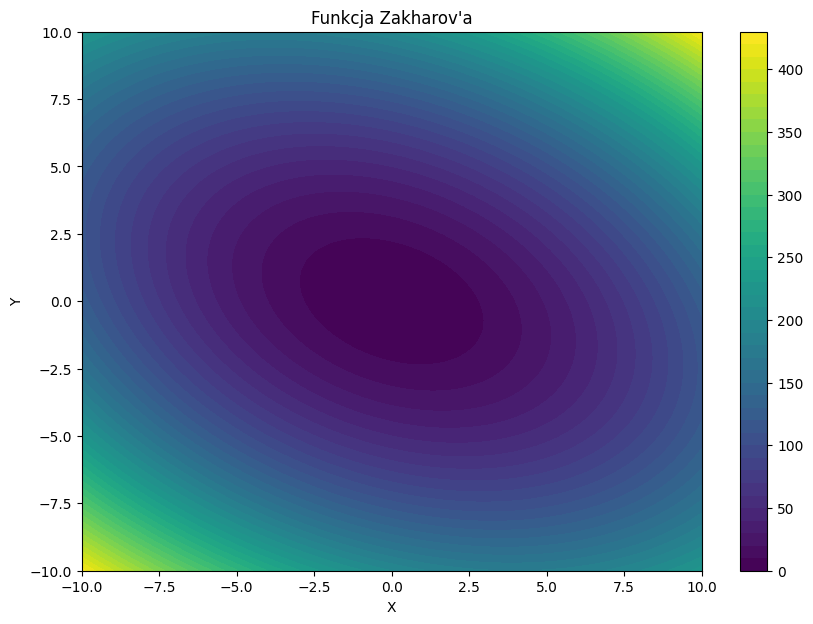

In [16]:
# Wizualizacja funkcji Zakharov w 3D
plt.figure(figsize=(10, 7))
plt.contourf(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar()
plt.title("Funkcja Zakharov'a")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

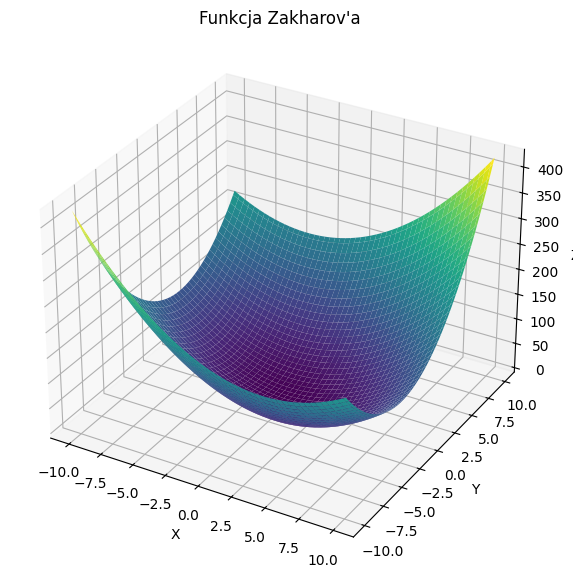

In [17]:
# Wizualizacja funkcji Zakharov w 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
ax.set_title("Funkcja Zakharov'a")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.show()

In [18]:
# Definiowanie algorytmu genetycznego o określonych operatorach krzyżowania i mutacji
algorithm = GA(
    pop_size=100, 
    crossover=SBX(prob=0.8, eta=1), 
    mutation=PolynomialMutation(prob=0.001, eta=5)
)
# Minimalizacja problemu Zakharov'a za pomocą algorytmu genetycznego przez 100 generacji
res = minimize(
    problem,
    algorithm,
    ('n_gen', 100),
    save_history=True,
    verbose=True
)

n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |      100 |  6.150471E+02 |  5.215456E+01
     2 |      200 |  1.692979E+02 |  9.7797270551
     3 |      300 |  1.123280E+02 |  9.7797270551
     4 |      400 |  7.002063E+01 |  5.8744785946
     5 |      500 |  4.375793E+01 |  4.1773796003
     6 |      600 |  2.545082E+01 |  4.1773796003
     7 |      700 |  1.363718E+01 |  4.1773796003
     8 |      800 |  6.6928092903 |  1.8136149339
     9 |      900 |  4.6587319170 |  1.8136149339
    10 |     1000 |  3.3688347754 |  1.1195369381
    11 |     1100 |  2.4102749148 |  0.7740416308
    12 |     1200 |  1.7133039727 |  0.6409496019
    13 |     1300 |  1.3452877613 |  0.6139701598
    14 |     1400 |  0.9664154369 |  0.3537369793
    15 |     1500 |  0.7657239285 |  0.1492023772
    16 |     1600 |  0.6459072182 |  0.1492023772
    17 |     1700 |  0.5129759947 |  0.1189136800
    18 |     1800 |  0.4071037232 |  0.0794073308
    19 |     1900 |  0.2970080100 |  0.0794073308


In [19]:
# Wyświetlanie optymalnego znalezionego rozwiązania
print("Najlepsze znalezione rozwiązanie:\nX -> zmienne decyzyjne\nF -> optymalna wartość funkcji\nX = %s\nF = %s" % (res.X, res.F))

Najlepsze znalezione rozwiązanie:
X -> zmienne decyzyjne
F -> optymalna wartość funkcji
X = [ 1.24279228e-05 -4.89666905e-05  1.23586741e-05  6.16114009e-05
 -3.79875508e-05]
F = [7.9602608e-09]


In [20]:
hist = res.history
n_evals = []
hist_F = []

for algo in hist:
    n_evals.append(algo.evaluator.n_eval)
    opt = algo.opt
    feas = np.where(opt.get("feasible"))[0]
    hist_F.append(opt.get("F")[feas])

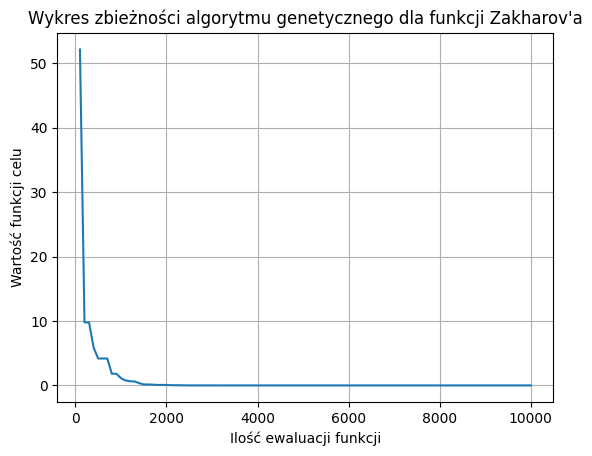

In [21]:
# Wyznaczanie wykresu zbieżności
plt.figure()
plt.plot(n_evals, np.reshape(hist_F, (100, 1)))
plt.xlabel('Ilość ewaluacji funkcji')
plt.ylabel('Wartość funkcji celu')
plt.title('Wykres zbieżności algorytmu genetycznego dla funkcji Zakharov\'a')
plt.grid(True)
plt.show()